In [186]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import requests 
import json
import os
from dotenv import load_dotenv
import pandas as pd
from pandas import json_normalize
from bs4 import BeautifulSoup
import time
import seaborn as sns
import plotly.express as px
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("vb_matches.csv",encoding = "ISO-8859-1")

In [45]:
df.sample(10)

circuit       tournament        country  year        date gender  \
74379    FIVB            Baden        Austria  2019  2019-06-07      W   
47223    FIVB        The Hague    Netherlands  2010  2010-08-24      M   
45344    FIVB            Seoul          Korea  2010  2010-05-25      W   
27625    FIVB        Marseille         France  2003  2003-07-15      W   
25465    FIVB        Marseille         France  2002  2002-07-16      W   
42103    FIVB        Myslowice         Poland  2008  2008-09-02      W   
7325      AVP       Sacramento  United States  2006  2006-06-15      M   
15519     AVP  Manhattan Beach  United States  2009  2009-07-16      W   
61070    FIVB       Cincinnati  United States  2016  2016-05-17      M   
47730    FIVB         Shanghai          China  2011  2011-05-03      W   

       match_num           w_player1 w_p1_birthdate   w_p1_age  ...  \
74379         11      Nadine Strauss     1995-11-18  23.550992  ...   
47223         32   Anders Lund Hoyer     1983-09-04  26.970568  ...   
45344         13  Karolina Marciniak     1988-03-18  22.184805  ...   
27625         11       Helke Claasen     1977-03-16  26.329911  ...   
25465          5     Kerri Pottharst     2065-06-25  37.056810  ...   
42103         24     Maria Antonelli     1984-02-25  24.520192  ...   
7325          24        Dain Blanton     1971-11-28  34.546201  ...   
15519         95           Jill Muhe     1975-11-02  33.702943  ...   
61070         48      Cesar Menendez     1991-10-25  24.561259  ...   
47730         59          April Ross     1982-06-20  28.867899  ...   

       l_p1_tot_blocks l_p1_tot_digs l_p2_tot_attacks l_p2_tot_kills  \
74379              NaN           NaN              NaN            NaN   
47223              NaN           NaN              NaN            NaN   
45344              NaN           NaN              NaN            NaN   
27625              NaN           NaN              NaN            NaN   
25465              NaN           NaN              NaN            NaN   
42103              NaN           NaN              NaN            NaN   
7325               0.0           6.0             23.0           11.0   
15519              0.0          12.0             34.0           15.0   
61070              NaN           NaN              NaN            NaN   
47730              NaN           NaN              NaN            NaN   

       l_p2_tot_errors  l_p2_tot_hitpct l_p2_tot_aces l_p2_tot_serve_errors  \
74379              NaN              NaN           NaN                   NaN   
47223              NaN              NaN           NaN                   NaN   
45344              NaN              NaN           NaN                   NaN   
27625              NaN              NaN           NaN                   NaN   
25465              NaN              NaN           NaN                   NaN   
42103              NaN              NaN           NaN                   NaN   
7325               6.0            0.217           1.0                   3.0   
15519              4.0            0.324           1.0                   1.0   
61070              NaN              NaN           NaN                   NaN   
47730              NaN              NaN           NaN                   NaN   

      l_p2_tot_blocks l_p2_tot_digs  
74379             NaN           NaN  
47223             NaN           NaN  
45344             NaN           NaN  
27625             NaN           NaN  
25465             NaN           NaN  
42103             NaN           NaN  
7325              1.0           1.0  
15519             0.0          11.0  
61070             NaN           NaN  
47730             NaN           NaN  

[10 rows x 65 columns]

In [19]:
df1 = df[['w_p1_age', 'w_p2_age']]

In [33]:
df1

w_p1_age   w_p2_age
0      29.694730  29.514032
1      27.356605  26.872006
2      31.203285  30.028747
3      32.386037  41.552361
4      32.054757  29.804244
...          ...        ...
76751  23.734428  17.401780
76752  22.154689  18.499658
76753  23.734428  17.401780
76754  25.467488  23.559206
76755  22.154689  18.499658

[76756 rows x 2 columns]

In [36]:
df2 = df1.w_p1_age.round()
df3 = df1.w_p2_age.round()

In [35]:
df2

0        30.0
1        27.0
2        31.0
3        32.0
4        32.0
         ... 
76751    24.0
76752    22.0
76753    24.0
76754    25.0
76755    22.0
Name: w_p1_age, Length: 76756, dtype: float64

In [37]:
df3

0        30.0
1        27.0
2        30.0
3        42.0
4        30.0
         ... 
76751    17.0
76752    18.0
76753    17.0
76754    24.0
76755    18.0
Name: w_p2_age, Length: 76756, dtype: float64

In [41]:
df4 = pd.merge(df2, df3, left_index=True, right_index=True)

In [42]:
df4

w_p1_age  w_p2_age
0          30.0      30.0
1          27.0      27.0
2          31.0      30.0
3          32.0      42.0
4          32.0      30.0
...         ...       ...
76751      24.0      17.0
76752      22.0      18.0
76753      24.0      17.0
76754      25.0      24.0
76755      22.0      18.0

[76756 rows x 2 columns]

In [4]:
lol_fandom = "https://lol.fandom.com/wiki/European_Players"
lol = requests.get(lol_fandom)

In [5]:
s_lol = BeautifulSoup(lol.content,"html.parser")

In [6]:
age_lol = s_lol.findAll("td",{"class":"field_Age"})

In [7]:
type(age_lol[0].getText())

str

In [8]:
lista1 = []
for x in range(len(age_lol)):
    y = age_lol[x].getText()
    lista1.append(y)

In [12]:
#lista1

In [15]:
def_lol = [x for x in lista1 if x != '']

In [18]:
len(def_lol)

211

In [59]:
df = pd.DataFrame(def_lol)

In [84]:
df.rename(columns={'[0]': 'Age'})

0
0    24
1    22
2    21
3    27
4    19
..   ..
206  22
207  21
208  26
209  20
210  22

[211 rows x 1 columns]

In [95]:
df.rename(columns={0:'Age'},inplace=True)

In [96]:
df

Age
0    24
1    22
2    21
3    27
4    19
..   ..
206  22
207  21
208  26
209  20
210  22

[211 rows x 1 columns]

In [126]:
df.sort_values(by=['Age'])
df["Age"] = pd.to_numeric(df["Age"], downcast="float")b

In [127]:
df

Age
0    24.0
1    22.0
2    21.0
3    27.0
4    19.0
..    ...
206  22.0
207  21.0
208  26.0
209  20.0
210  22.0

[211 rows x 1 columns]

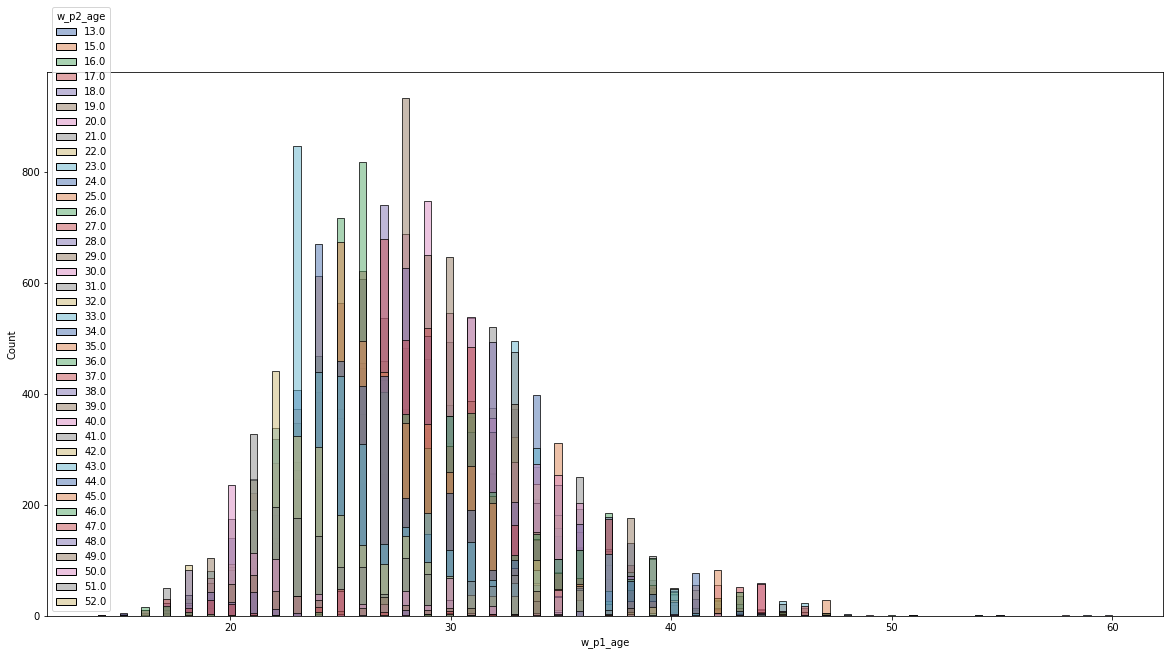

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(data = df4,x="w_p1_age",hue = "w_p2_age",multiple="layer",palette="deep",fill="false");

<AxesSubplot:xlabel='Age', ylabel='count'>

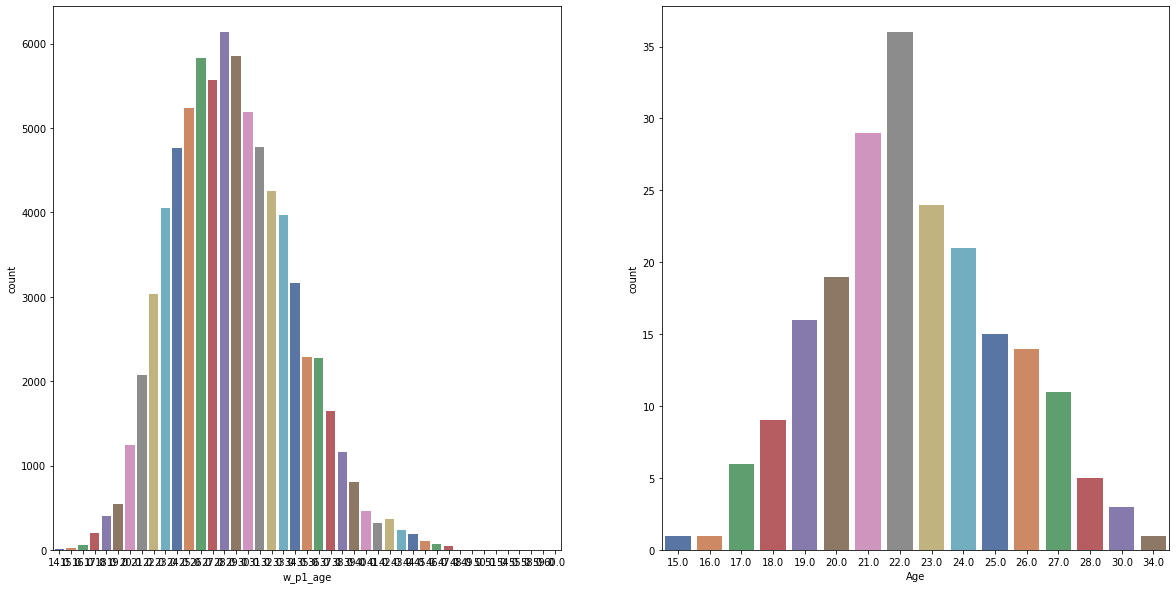

In [128]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.countplot(data = df4,x="w_p1_age",palette="deep",ax=axs[0])
sns.countplot(data = df,x="Age",palette="deep",ax=axs[1])


<AxesSubplot:xlabel='Age', ylabel='Density'>

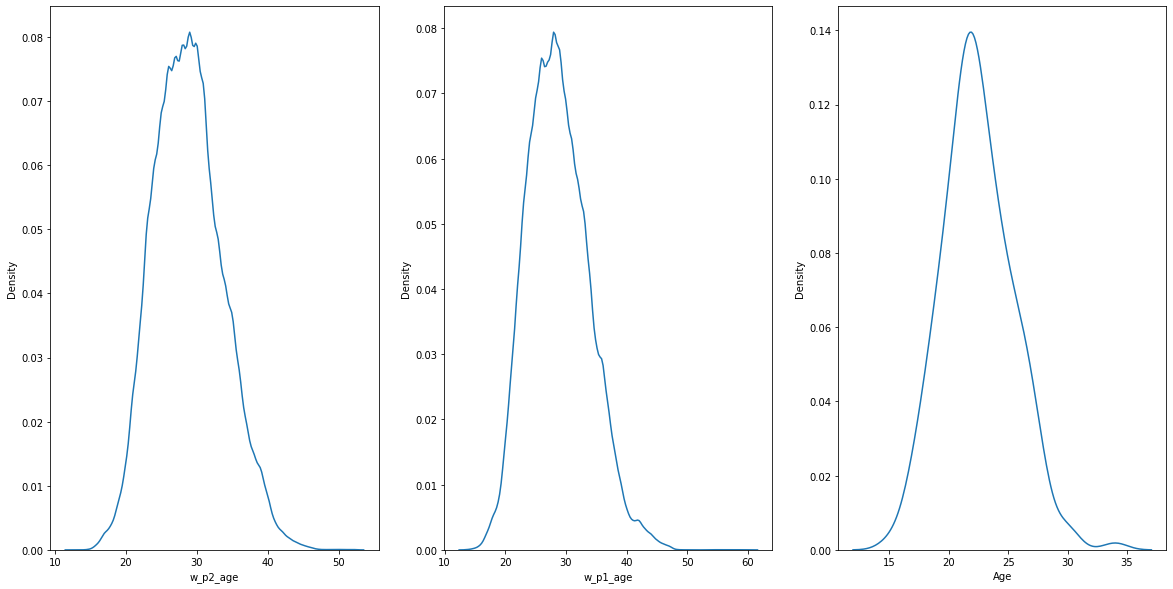

In [175]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.kdeplot(data = df4,x="w_p2_age",palette="deep",ax=axs[0])
sns.kdeplot(data = df4,x="w_p1_age",palette="deep",ax=axs[1])
sns.kdeplot(data = df,x="Age",palette="deep",ax=axs[2])

<AxesSubplot:xlabel='Age', ylabel='Count'>

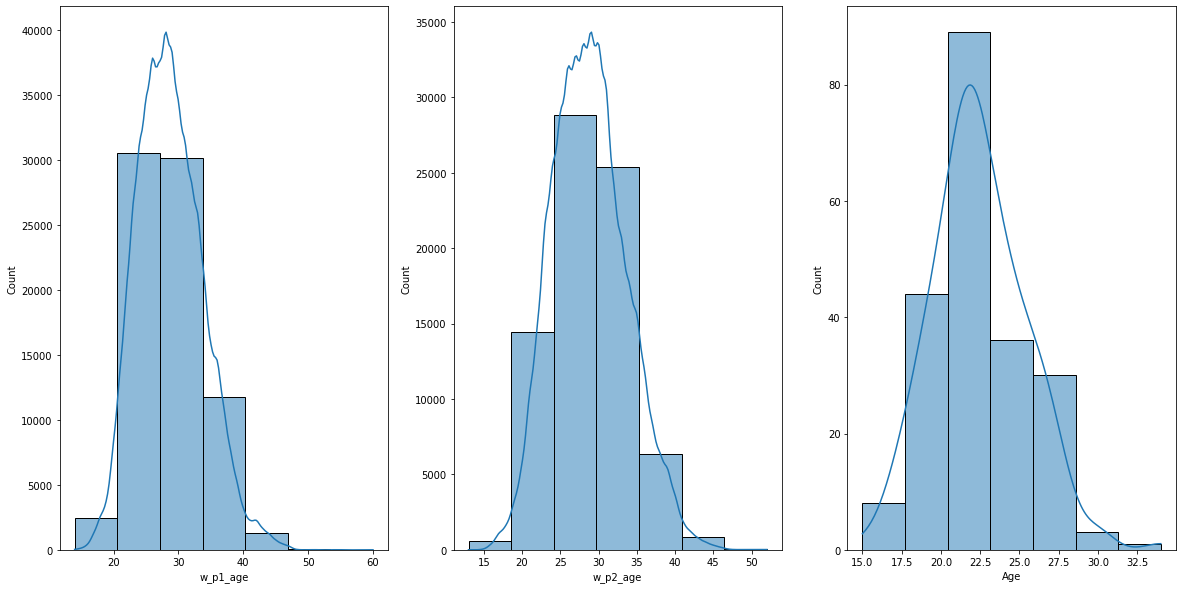

In [153]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.histplot(data=df4,x="w_p1_age",bins=7,kde=True,palette="deep",ax=axs[0])
sns.histplot(data=df4,x="w_p2_age",bins=7,kde=True,palette="deep",ax=axs[1])
sns.histplot(data=df,x="Age",bins=7,kde=True,palette="deep",ax=axs[2])

<AxesSubplot:ylabel='Count'>

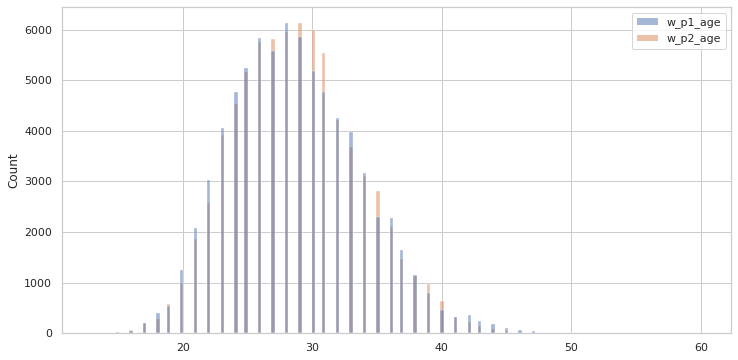

In [187]:
sns.histplot(data=df4)

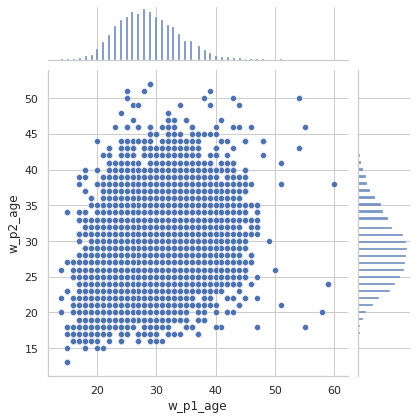

In [188]:
sns.jointplot(x = "w_p1_age", y = "w_p2_age", data = df4,kind="scatter")

In [171]:
fig = px.box(df4, y="w_p1_age",points="all")
fig.show()

In [183]:
px.box(df4, y="w_p1_age")

In [184]:
px.box(df4, y="w_p2_age")

In [185]:
px.box(df, y="Age")